In [1]:
import pandas as pd
import numpy as np
#data = pd.read_csv("../prediction_data_diff_rating_shuffled.csv")
data = pd.read_csv("../prediction_data_diff_rating_shuffled.csv")
problems = pd.read_csv("../../ChessPuzzleEmbeddings/optimal_meta.tsv",sep='\t')

In [2]:
data

,user_hash,puzzle_1,puzzle_2,cluster_1,rating_1,tag_1,cluster_2,rating_2,tag_2,passed_puzzle
0,4c686166444b20f7c2a251409c75d532502ec84da5f8aa...,64087,29518,4,2224,Queen Sacrifice,5,1122,Defense,1
1,5e363659fb81b1b869c848ea17217cc7ecdf6c27bd5ad1...,34677,64087,4,2327,Overloading,4,2224,Queen Sacrifice,0
2,b064a6664bc7866c968088d7745f40e00f843b95b986b3...,64087,107782,4,2224,Queen Sacrifice,5,1215,Windmill,1
3,b2f60e6c9745136cd9901496e76c74d2a67cecfbc0f8ae...,138357,64087,4,2097,Attacking f7/f2,4,2224,Queen Sacrifice,0
4,0b44ef327d4ebe46f709a806c2570ad55a7f9ce3048953...,64087,154773,4,2224,Queen Sacrifice,5,1462,Basic Checkmates,1
...,...,...,...,...,...,...,...,...,...,...
242724,4ae38548b39e5795f4891adef3c635f37dc5bda55ebe93...,57716,132975,9,636,Mate in 3+,8,423,Pin,1
242725,4ae38548b39e5795f4891adef3c635f37dc5bda55ebe93...,46335,126903,9,400,Mate in 2,8,408,Mate in 2,0
242726,11986900932242f3b251e8ab448a95767e392e849b725e...,174658,114837,8,400,Mate in 1,8,403,Mate in 1,0
242727,11986900932242f3b251e8ab448a95767e392e849b725e...,151463,120771,8,440,Mate in 1,8,416,Mate in 1,0


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder()
data[['tag_1','tag_2']] = ordinal_encoder.fit_transform(data[['tag_1','tag_2']])
#scaler= MinMaxScaler()
data[['rating_1','rating_2']] = scaler.fit_transform(data[['rating_1','rating_2']])

In [4]:
data.groupby(['cluster_1','passed_puzzle'])['user_hash'].count()

cluster_1  passed_puzzle
1          0                  318
           1                  276
2          0                23514
           1                25056
4          0                12324
           1                14078
5          0                28110
           1                29933
7          0                   22
           1                   24
8          0                 2774
           1                 2016
9          0                 1467
           1                  981
13         0                 1281
           1                 1289
14         0                32281
           1                31483
15         0                 3044
           1                 3057
16         0                 7089
           1                 6179
17         0                 8401
           1                 6984
18         0                  421
           1                  310
20         0                    9
           1                    8
Name: user_hash, dtype:

In [17]:
#Random guessing
import random

def rand_prediction(row):
    pred = 0
    num = random.randint(0,1)
    if num > 0.5:
        pred = 1
    if pred == row['passed_puzzle']:
        return 1
ans = data.apply(lambda x: rand_prediction(x),axis=1)
print(ans.fillna(0).sum()/len(data))

0.49964775531559885


In [5]:
#Naive Prediction by taking max value
data['min'] = data[['rating_1','rating_2']].min(axis=1)
zero_preds = data.loc[data['min'] == data['rating_1']]
one_preds = data.loc[data['min'] == data['rating_2']]
zero_acc = zero_preds.loc[zero_preds['passed_puzzle'] == 0].shape[0]/len(data)
one_acc = one_preds.loc[one_preds['passed_puzzle'] == 1].shape[0]/len(data)
print(zero_acc + one_acc)

0.5849445266119828


In [14]:
data

,user_hash,puzzle_1,puzzle_2,cluster_1,rating_1,tag_1,cluster_2,rating_2,tag_2,passed_puzzle,min,rating_diff
0,4c686166444b20f7c2a251409c75d532502ec84da5f8aa...,64087,29518,4,2.418056,26.0,5,-0.156627,6.0,1,-0.156627,2.574683
1,5e363659fb81b1b869c848ea17217cc7ecdf6c27bd5ad1...,34677,64087,4,2.658662,22.0,4,2.421313,25.0,0,2.421313,0.237349
2,b064a6664bc7866c968088d7745f40e00f843b95b986b3...,64087,107782,4,2.418056,26.0,5,0.060931,35.0,1,0.060931,2.357125
3,b2f60e6c9745136cd9901496e76c74d2a67cecfbc0f8ae...,138357,64087,4,2.121387,1.0,4,2.421313,25.0,0,2.121387,-0.299927
4,0b44ef327d4ebe46f709a806c2570ad55a7f9ce3048953...,64087,154773,4,2.418056,26.0,5,0.638745,3.0,1,0.638745,1.779311
...,...,...,...,...,...,...,...,...,...,...,...,...
242724,4ae38548b39e5795f4891adef3c635f37dc5bda55ebe93...,57716,132975,9,-1.291479,19.0,8,-1.791817,24.0,1,-1.791817,0.500338
242725,4ae38548b39e5795f4891adef3c635f37dc5bda55ebe93...,46335,126903,9,-1.842771,18.0,8,-1.826907,17.0,0,-1.842771,-0.015863
242726,11986900932242f3b251e8ab448a95767e392e849b725e...,174658,114837,8,-1.842771,17.0,8,-1.838604,16.0,0,-1.842771,-0.004167
242727,11986900932242f3b251e8ab448a95767e392e849b725e...,151463,120771,8,-1.749331,17.0,8,-1.808193,16.0,0,-1.808193,0.058861


In [20]:
data['rating_diff'] = data['rating_1'] - data['rating_2']

In [21]:
'''
passed_perf = data.loc[data['passed_puzzle'] == 0]['cluster_perf_1'].sum() + data.loc[data['passed_puzzle'] == 1]['cluster_perf_2'].sum()
failed_perf = data.loc[data['passed_puzzle'] == 1]['cluster_perf_1'].sum() + data.loc[data['passed_puzzle'] == 0]['cluster_perf_2'].sum()
passed_perf = passed_perf/len(data)
failed_perf = failed_perf/len(data)
print('Passed avg perf: ' + str(passed_perf))
print('Failed avg perf: ' + str(failed_perf))
'''

"\npassed_perf = data.loc[data['passed_puzzle'] == 0]['cluster_perf_1'].sum() + data.loc[data['passed_puzzle'] == 1]['cluster_perf_2'].sum()\nfailed_perf = data.loc[data['passed_puzzle'] == 1]['cluster_perf_1'].sum() + data.loc[data['passed_puzzle'] == 0]['cluster_perf_2'].sum()\npassed_perf = passed_perf/len(data)\nfailed_perf = failed_perf/len(data)\nprint('Passed avg perf: ' + str(passed_perf))\nprint('Failed avg perf: ' + str(failed_perf))\n"

In [11]:
passed_attempts = data.loc[(data['passed_puzzle'] == 0)][['rating_1','cluster_1','cluster_perf_1','performance_diff']]
passed_attempts.columns = ['rating','cluster','cluster_perf','diff']
temp = data.loc[(data['passed_puzzle'] == 1)][['rating_2','cluster_2','cluster_perf_2','performance_diff']]
temp.columns = ['rating','cluster','cluster_perf','diff']
passed_attempts = passed_attempts.append(temp)

failed_attempts = data.loc[(data['passed_puzzle'] == 1)][['rating_1','cluster_1','cluster_perf_1','performance_diff']]
failed_attempts.columns = ['rating','cluster','cluster_perf','diff']
temp = data.loc[(data['passed_puzzle'] == 0)][['rating_2','cluster_2','cluster_perf_2','performance_diff']]
temp.columns = ['rating','cluster','cluster_perf','diff']
failed_attempts = failed_attempts.append(temp)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(passed_attempts['cluster_perf'],bins=50,label='passed',alpha=0.5)
plt.hist(failed_attempts['cluster_perf'],bins=50,label='failed',alpha=0.5)
plt.legend(loc='best')
plt.savefig('passed_failed_histogram.png')
plt.show()

In [ ]:
plt.hist(passed_attempts['cluster'],bins=50,label='passed',alpha=0.5)
plt.hist(failed_attempts['cluster'],bins=50,label='failed',alpha=0.5)
plt.legend(loc='best')
plt.savefig('clusters_passed_failed.png')
plt.show()

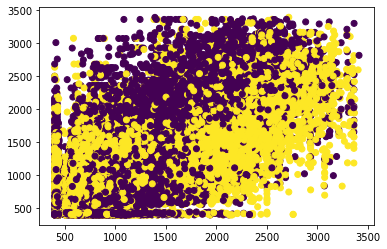

In [23]:
plt.scatter(data['rating_1'],data['rating_2'],c=data['passed_puzzle'])
#plt.savefig('tag_encoded_cluster_perf_scatter.png')

In [ ]:
'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

X = first['cluster_perf_1'][:-100].to_numpy().reshape(-1,1)
y = first['cluster_perf_2'][:-100]
X_test = first['cluster_perf_1'][-100:].to_numpy().reshape(-1,1)
y_test = first['cluster_perf_2'][-100:]

# Train the model using the training sets
regr.fit(X,y)

preds = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, preds))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, preds))

plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,preds,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()
'''

In [17]:
random_samples = np.random.choice(data.index,10000)
X = data.iloc[random_samples][['rating_1','rating_2']]
y = data.iloc[random_samples]['passed_puzzle']

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg,X,y,cv=3,scoring='accuracy')
print(scores)

[0.58188362 0.579958   0.58865887]


In [20]:
sum(scores)/len(scores)

0.5835001616538379

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X,y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
scores = cross_val_score(sgd_clf,X,y,cv=5,scoring='accuracy')
print(scores)
print(sum(scores)/len(scores))

[0.5835 0.57   0.554  0.572  0.58  ]
0.5719000000000001


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
X_train.shape

(8000, 2)

In [27]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[581 420]
 [383 616]]
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1001
           1       0.59      0.62      0.61       999

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



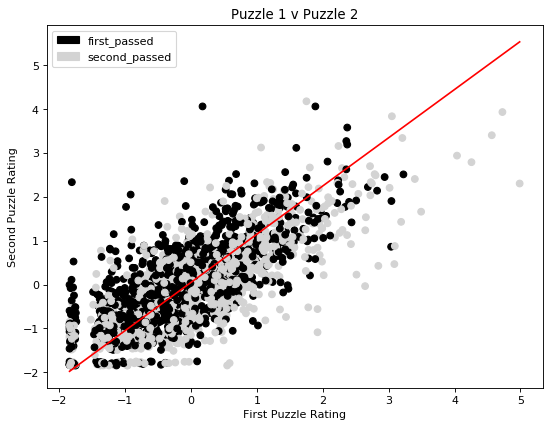

In [29]:
# Plot data points and color using their class
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
color = ['black' if c == 0 else 'lightgrey' for c in y_test]
plt.scatter(X_test['rating_1'], X_test['rating_2'], c=color)

# Create the hyperplane
w = svclassifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X_test['rating_1']),max(X_test['rating_1']))
yy = a * xx - (svclassifier.intercept_[0]) / w[1]

black_patch = mpatches.Patch(color='black', label='first_passed')
grey_patch = mpatches.Patch(color='lightgrey', label='second_passed')
plt.legend(handles=[black_patch,grey_patch])

# Plot the hyperplane
plt.title('Puzzle 1 v Puzzle 2')
plt.plot(xx, yy,c='red')
plt.xlabel("First Puzzle Rating")
plt.ylabel("Second Puzzle Rating")
plt.savefig('SVM_decision_boundary_puzzleratings.png')
plt.show()

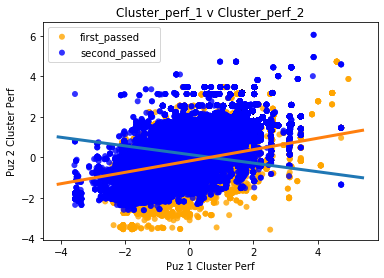

In [27]:
#np.random.seed(42)

samples = np.random.choice(data.index,len(data))
sampled_data = data.iloc[samples]
first = sampled_data.loc[data['passed_puzzle'] == 0][['cluster_perf_1','cluster_perf_2']]
second = sampled_data.loc[data['passed_puzzle'] == 1][['cluster_perf_1','cluster_perf_2']]

points = (first,second)
color = ('orange','blue')
groups = ('first_passed','second_passed')

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for points,color,group in zip(points,color,groups):
    ax.scatter(points['cluster_perf_1'],points['cluster_perf_2'], alpha=0.8, c=color, edgecolors='none', label=group)

ax.set_xlabel('Puz 1 Cluster Perf')
ax.set_ylabel('Puz 2 Cluster Perf')
x_vals = np.array(ax.get_xlim())
y_vals = log_reg.intercept_ + log_reg.coef_.reshape(-1,1) * x_vals
plt.plot(x_vals, y_vals,lw=3)
plt.title('Cluster_perf_1 v Cluster_perf_2')
plt.legend(loc=2)
plt.savefig('cluster_perf_log_reg_plot.png')
plt.show()